In [193]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from sklearn import preprocessing
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

In [2]:
df = pd.read_csv('comprehensive_hospital_medicare_data.csv')

In [3]:
df.head()

,Unnamed: 0,System,catchment_area_sqmi,count,num_beds,tract_race_acs2018_Total,tract_race_acs2018_White,tract_race_acs2018_Black,tract_race_acs2018_Native,tract_race_acs2018_Asian,...,871_2015_Total_Payments,871_2015_Non_Medicare_Payments,871_2016_Discharges,871_2016_Medicare_Payments,871_2016_Total_Payments,871_2016_Non_Medicare_Payments,871_2017_Discharges,871_2017_Medicare_Payments,871_2017_Total_Payments,871_2017_Non_Medicare_Payments
0,1,Wyckoff Heights Medical Center,8.720,1,324,308582,159610,66408,1358,19051,...,-5.4,-5.0,-8.1,-3.8,-2.2,10.1,36.3,2.6,4.2,14.8
1,2,SUNY,6.883,3,1109,502394,150508,261084,1556,36239,...,-22.6,-2.9,6.3,-1.9,-0.5,6.5,-17.3,20.1,22.3,32.9
2,3,St. Johns Episcopal Hospital So Shore,16.280,1,257,189625,57223,109528,829,5870,...,-2.7,19.0,-27.9,5.6,6.7,11.3,4.0,-0.2,-0.6,-2.4
3,4,St. Barnabas Hospital Health System,3.596,1,422,266363,41321,72878,1835,6183,...,-10.5,-7.4,-12.7,8.7,13.2,48.0,27.1,-2.4,-6.4,-29.8
4,5,NYU Langone,6.632,4,1658,377044,268848,21853,1338,53804,...,-7.9,10.4,-6.9,1.0,0.7,-1.2,20.4,9.2,8.1,2.2


In [5]:
df.columns

Index(['Unnamed: 0', 'System', 'catchment_area_sqmi', 'count', 'num_beds',
       'tract_race_acs2018_Total', 'tract_race_acs2018_White',
       'tract_race_acs2018_Black', 'tract_race_acs2018_Native',
       'tract_race_acs2018_Asian', 'tract_race_acs2018_Pacific Islander',
       'tract_race_acs2018_Other', 'tract_race_acs2018_Two or More',
       'household_income_acs2018_Households (HH) Count',
       'household_income_acs2018_HH 0-10k',
       'household_income_acs2018_HH 10k-15k',
       'household_income_acs2018_HH 15k-25k',
       'household_income_acs2018_HH 25k-35k',
       'household_income_acs2018_HH 35k-50k',
       'household_income_acs2018_HH 50k-75k',
       'household_income_acs2018_HH 75k-100k',
       'household_income_acs2018_HH 100k-150k',
       'household_income_acs2018_HH 150k-200k',
       'household_income_acs2018_HH 200k-UP', '291_2015_Discharges',
       '291_2015_Medicare_Payments', '291_2015_Total_Payments',
       '291_2015_Non_Medicare_Payments', '291_20

In [84]:
X = df.loc[:,'catchment_area_sqmi':'871_2017_Non_Medicare_Payments']

In [10]:
range_n_clusters = range(2,10)
sil = []

for n_clusters in range_n_clusters:
    km = KMeans(random_state = 100, n_clusters = n_clusters)
    res = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, res)
    sil.append(silhouette_avg)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.6514669890190499
For n_clusters = 3, the average silhouette_score is : 0.6757358281345291
For n_clusters = 4, the average silhouette_score is : 0.5918464544175397
For n_clusters = 5, the average silhouette_score is : 0.4937013840553227
For n_clusters = 6, the average silhouette_score is : 0.3245838415760708
For n_clusters = 7, the average silhouette_score is : 0.3135584212381341
For n_clusters = 8, the average silhouette_score is : 0.23493877802855564
For n_clusters = 9, the average silhouette_score is : 0.1945183938804673


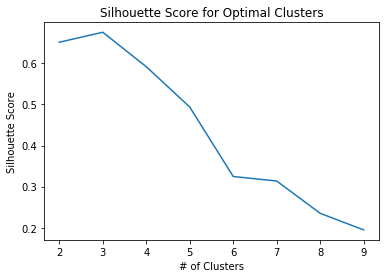

In [18]:
plt.plot(range_n_clusters, sil)
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

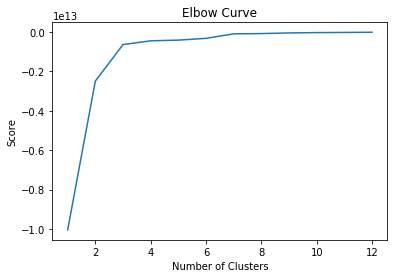

In [315]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 13
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X).score(X) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [202]:
km = KMeans(random_state=234, n_clusters=3)
res = km.fit(X)

In [203]:
from collections import Counter, defaultdict
print(Counter(res.labels_))

Counter({1: 9, 0: 3, 2: 2})


In [57]:
df["cluster"] = res.labels_

In [107]:
list(df['System'][df['cluster'] == 0])

['Northwell', 'NewYork-Presbyterian', 'Montefiore']

In [109]:
list(df['System'][df['cluster'] == 1])

['Wyckoff Heights Medical Center',
 'SUNY',
 'St. Johns Episcopal Hospital So Shore',
 'St. Barnabas Hospital Health System',
 'NYU Langone',
 'Jamaica Hospital Medical Center',
 'Interfaith Medical Center',
 'Flushing Hospital Medical Center',
 'Brookdale Hospital Medical Center']

In [108]:
list(df['System'][df['cluster'] == 2])

['Mount Sinai', 'Health+']

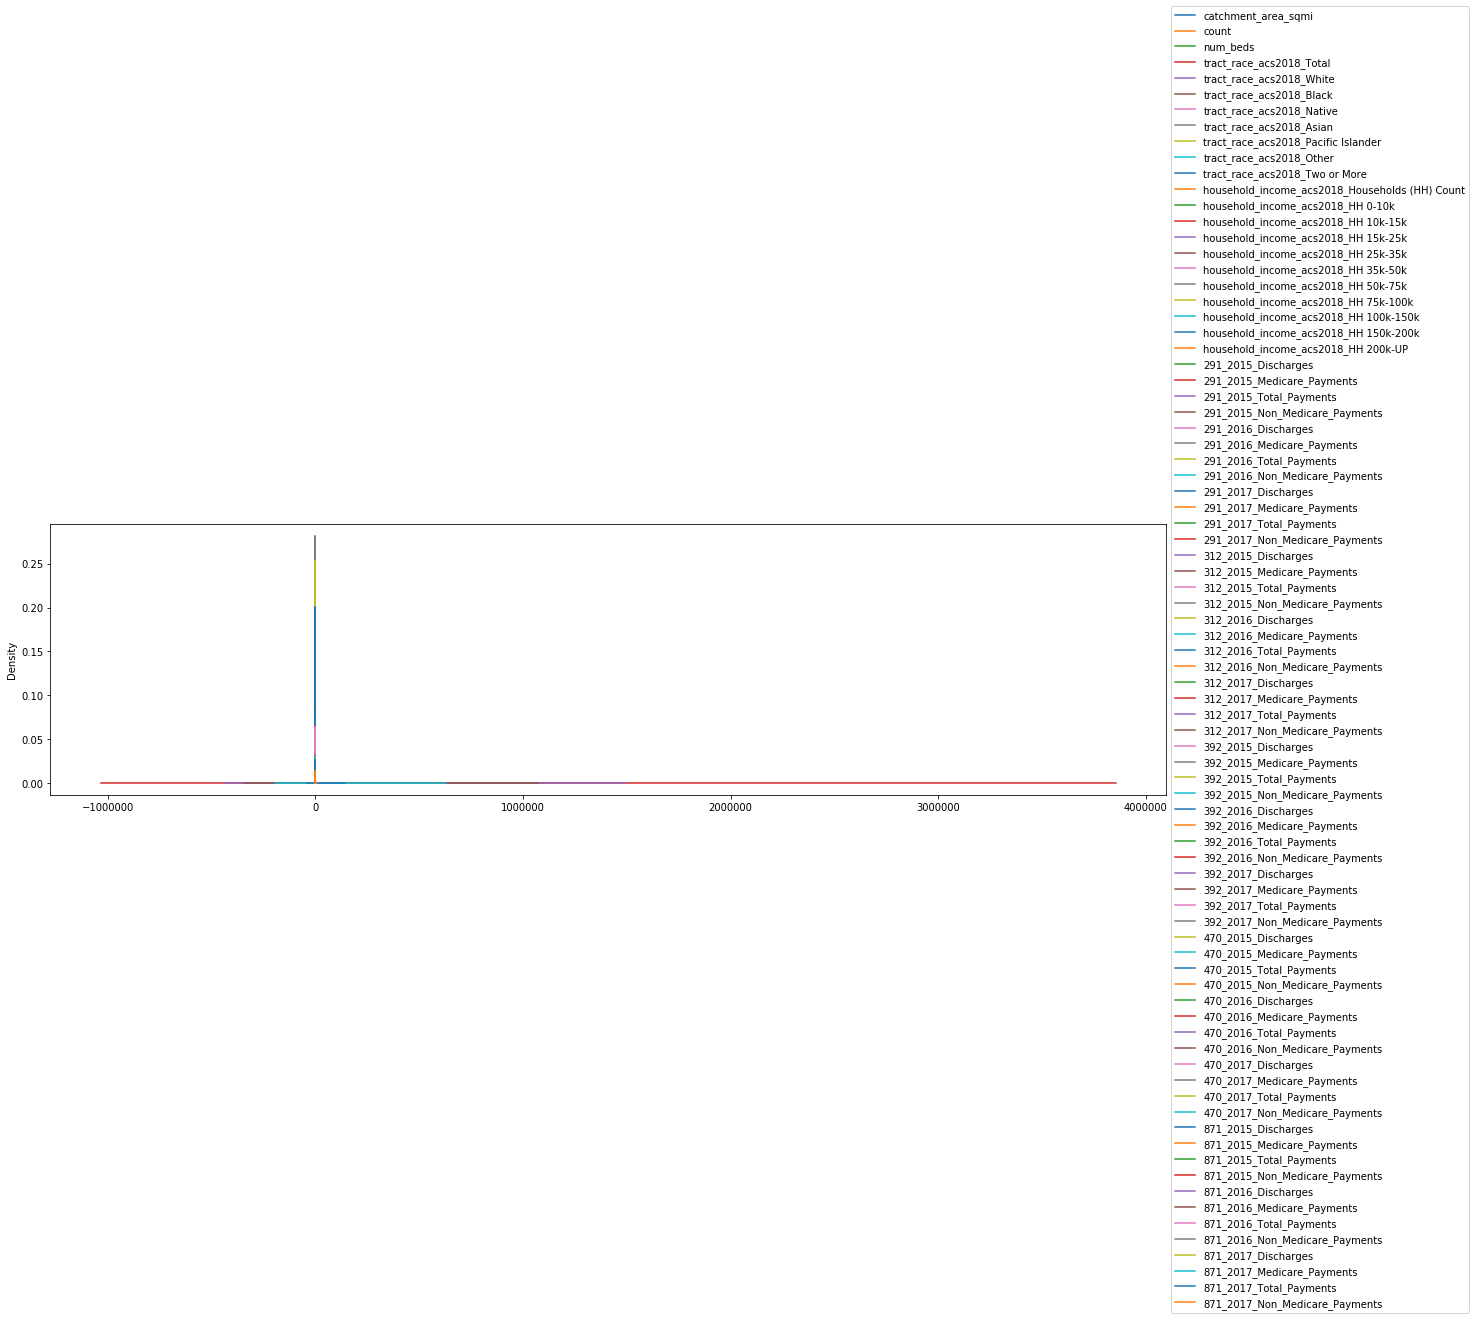

In [113]:
# Plotting raw data
X.plot(kind='density',sharex=True,figsize=(20,5),layout=(10,1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [116]:
# Scaled Data
X_scaled = preprocessing.StandardScaler().fit(X)
data_X_scaled = X_scaled.transform(X)  

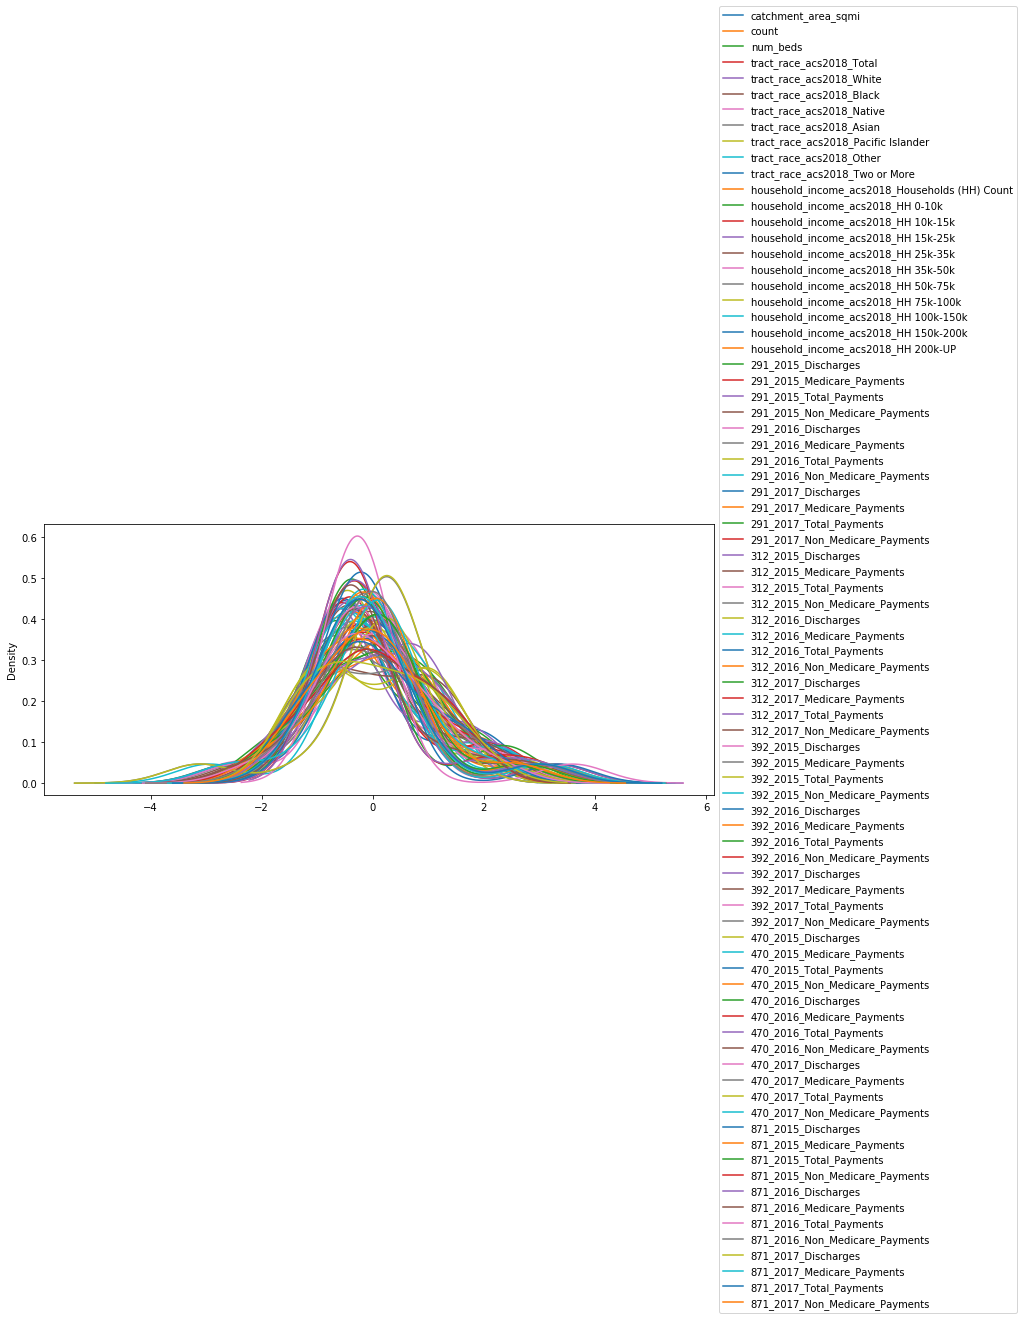

In [120]:
# Plot scaled data
pd.DataFrame(data_X_scaled,columns=X.columns).plot(kind='density',sharex=True,figsize=(12,5),layout=(10,1))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# k-means clustering again on the scaled data

In [155]:
range_n_clusters = range(2,10)
sil = []

for n_clusters in range_n_clusters:
    km = KMeans(random_state = 100, n_clusters = n_clusters)
    res = km.fit_predict(data_X_scaled)
    silhouette_avg = silhouette_score(data_X_scaled, res)
    sil.append(silhouette_avg)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.2585242754107882
For n_clusters = 3, the average silhouette_score is : 0.2015679946764777
For n_clusters = 4, the average silhouette_score is : 0.08036125083856246
For n_clusters = 5, the average silhouette_score is : 0.08125809187353317
For n_clusters = 6, the average silhouette_score is : 0.053500117463158116
For n_clusters = 7, the average silhouette_score is : 0.019925494003357226
For n_clusters = 8, the average silhouette_score is : 0.03450281506178301
For n_clusters = 9, the average silhouette_score is : 0.052791558674731585


In [156]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=3, n_init=10)

# Fit the data to the model
kmeans.fit(data_X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(data_X_scaled)

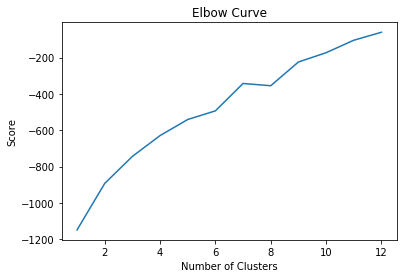

In [159]:
# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 13
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(data_X_scaled).score(data_X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
# Silhouette scores and curve is bad
# keep same clusters identified from original dataset
# is this correct to do?? idk

In [138]:
# Import the PCA function from sklearn
from sklearn.decomposition import PCA

# Select the number of principal components we will return
num_components = 10

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(data_X_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [139]:
pca.explained_variance_ratio_

array([0.24141161, 0.16840604, 0.1169834 , 0.0910625 , 0.08192535,
       0.07330271, 0.05622121, 0.0524878 , 0.04014349, 0.03518521])

In [140]:
pca.explained_variance_ratio_.cumsum()

array([0.24141161, 0.40981765, 0.52680105, 0.61786355, 0.6997889 ,
       0.77309161, 0.82931282, 0.88180062, 0.92194411, 0.95712932])

In [132]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

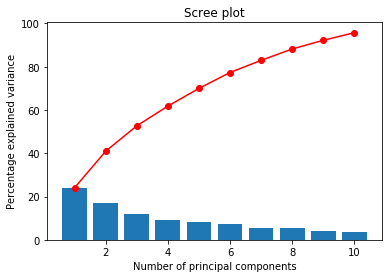

In [133]:
display_scree_plot(pca) 

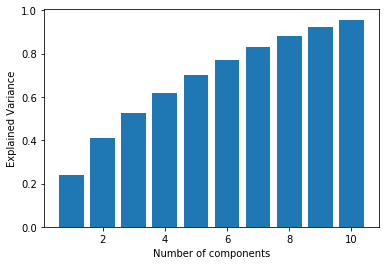

In [142]:
#plot explained variance over the number of compinents
n = 10
plt.bar(np.arange(n)+1, pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [147]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(data_X_scaled, columns=X.columns, index=df['System'])
X_scaled_clustered['cluster'] = res.labels_

X_scaled_clustered.head()

,catchment_area_sqmi,count,num_beds,tract_race_acs2018_Total,tract_race_acs2018_White,tract_race_acs2018_Black,tract_race_acs2018_Native,tract_race_acs2018_Asian,tract_race_acs2018_Pacific Islander,tract_race_acs2018_Other,...,871_2015_Non_Medicare_Payments,871_2016_Discharges,871_2016_Medicare_Payments,871_2016_Total_Payments,871_2016_Non_Medicare_Payments,871_2017_Discharges,871_2017_Medicare_Payments,871_2017_Total_Payments,871_2017_Non_Medicare_Payments,cluster
System,,,,,,,,,,,,,,,,,,,,,
Wyckoff Heights Medical Center,-0.678730,-0.797724,-0.837001,-0.687714,-0.538073,-0.723355,-0.623221,-0.848284,-0.731627,-0.550704,...,-0.001689,-0.229332,-0.803843,-0.551100,0.324286,1.271761,-0.183362,-0.088381,0.284069,1
SUNY,-0.769790,-0.265908,-0.350094,-0.422870,-0.564482,0.331862,-0.568545,-0.688409,-0.731627,-0.681643,...,0.122484,0.633230,-0.430028,-0.252326,0.075897,-1.159032,0.901752,0.963061,0.972243,1
St. Johns Episcopal Hospital So Shore,-0.303981,-0.797724,-0.878559,-0.850269,-0.835150,-0.489629,-0.769303,-0.970888,-0.576650,-0.869032,...,1.417438,-1.415354,1.045559,1.013070,0.407082,-0.193064,-0.356980,-0.367216,-0.369887,1
St. Barnabas Hospital Health System,-0.932727,-0.797724,-0.776215,-0.745406,-0.881290,-0.688285,-0.491500,-0.967977,-0.486048,0.091289,...,-0.143602,-0.504872,1.655468,2.155442,2.939269,0.854535,-0.493395,-0.704143,-1.411653,1
NYU Langone,-0.782232,0.000000,-0.009570,-0.594160,-0.221118,-0.964860,-0.628744,-0.525027,0.238767,-0.836191,...,0.908917,-0.157452,0.140532,-0.041427,-0.455380,0.550686,0.225881,0.138173,-0.194992,1


In [148]:
# From the chart, use 9 principal components to do analysis

pca = PCA(n_components=9)
pca.fit(data_X_scaled)

X_reduced = pca.transform(data_X_scaled)

In [152]:
X_reduceddf = pd.DataFrame(X_reduced, index=df['System'], columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
X_reduceddf['cluster'] = res.labels_
X_reduceddf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster
System,,,,,,,,,,
Wyckoff Heights Medical Center,-3.596189,-1.269068,-0.247665,-1.575155,-1.209095,-1.144032,1.634322,1.472273,0.482436,1
SUNY,-3.171039,-1.741389,-1.856076,6.005639,2.581374,-4.059645,-1.443124,-1.555662,-2.172295,1
St. Johns Episcopal Hospital So Shore,-1.355420,0.059223,-2.576390,1.562945,-0.368996,4.307410,0.708753,-0.110599,2.847665,1
St. Barnabas Hospital Health System,-3.503289,-3.221722,4.742570,-1.785506,5.415758,2.894915,-0.628658,-0.822591,-0.149098,1
NYU Langone,-0.380106,2.756488,-5.148692,1.008664,-0.077795,-0.595145,-1.976037,-0.077519,2.447982,1


In [160]:
centres_reduced = pca.transform(km.cluster_centers_)

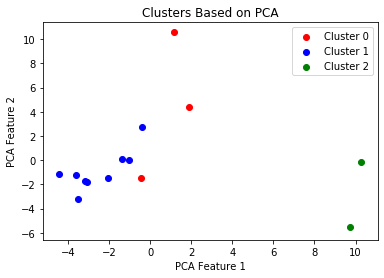

In [186]:
plt.scatter(X_reduceddf['PC1'][X_reduceddf['cluster']==0],X_reduceddf['PC2'][X_reduceddf['cluster']==0], color='red')
plt.scatter(X_reduceddf['PC1'][X_reduceddf['cluster']==1],X_reduceddf['PC2'][X_reduceddf['cluster']==1], color='blue')
plt.scatter(X_reduceddf['PC1'][X_reduceddf['cluster']==2],X_reduceddf['PC2'][X_reduceddf['cluster']==2], color='green')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Clusters Based on PCA')
plt.show()

In [314]:
# Parallel Coordinate Plots

In [279]:
import seaborn as sns
palette = sns.color_palette("bright", 10)

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    # Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
#     for i in range(num_clusters):    
#         plt.subplot(num_clusters, 1, i+1)
#         for j,c in enumerate(cluster_points): 
#             if i!= j:
#                 pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.5)])
    pc = parallel_coordinates(cluster_points[0], 'cluster', color=[addAlpha(palette[0],0.5)])
    pc = parallel_coordinates(cluster_points[1], 'cluster', color=[addAlpha(palette[1],0.5)])
    pc = parallel_coordinates(cluster_points[2], 'cluster', color=[addAlpha(palette[2],0.5)])

# Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)

In [313]:
X_og = X
X_og['cluster'] = res.labels_

In [ ]:
attribute_list = ['catchment_area_sqmi', 'count', 'num_beds','cluster']

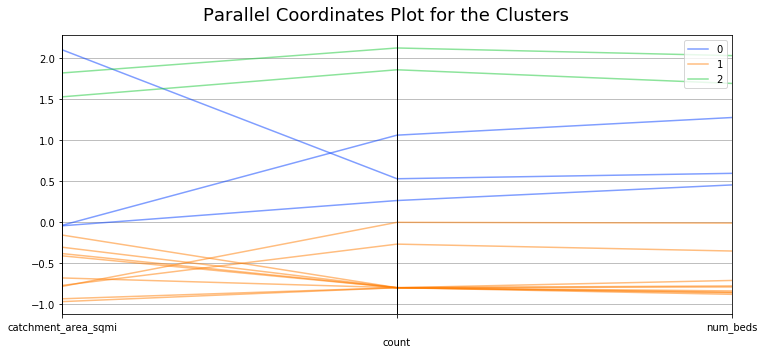

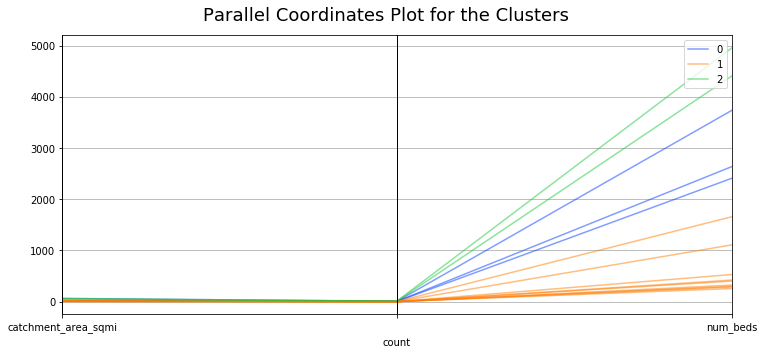

In [312]:
#Scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled_clustered[attribute_list], 3)

#Not scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_og[attribute_list], 3)

In [272]:
tract_list = ['tract_race_acs2018_Total',
       'tract_race_acs2018_White', 'tract_race_acs2018_Black',
       'tract_race_acs2018_Native', 'tract_race_acs2018_Asian',
       'tract_race_acs2018_Pacific Islander', 'tract_race_acs2018_Other',
       'tract_race_acs2018_Two or More', 'cluster']

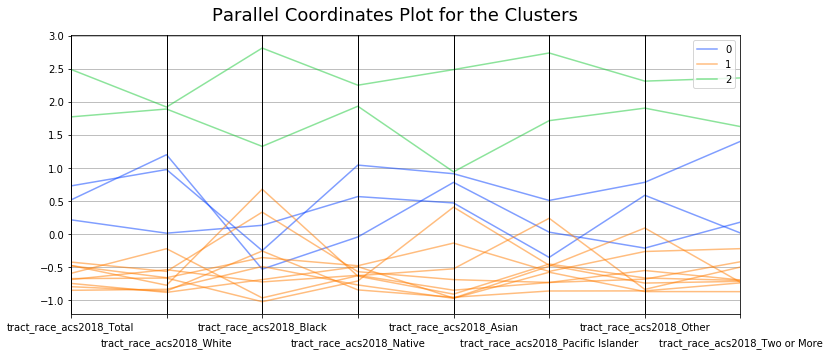

In [280]:
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled_clustered[tract_list], 3)

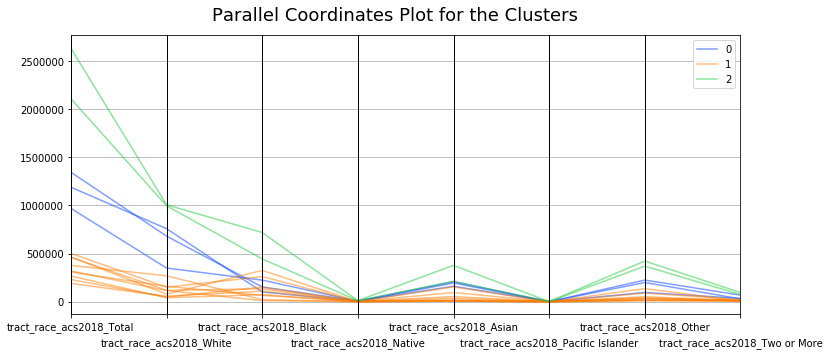

In [281]:
# Not scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_og[tract_list], 3)

In [285]:
X_scaled_clustered_income = X_scaled_clustered.rename(columns={"household_income_acs2018_Households (HH) Count": "Household Count",
                                          "household_income_acs2018_HH 0-10k": "0-10k",
                                           'household_income_acs2018_HH 10k-15k': '10k-15k',
                                           'household_income_acs2018_HH 15k-25k': '15k-25k',
                                           'household_income_acs2018_HH 25k-35k': '25k-35k',
                                           'household_income_acs2018_HH 35k-50k': '35k-50k',
                                           'household_income_acs2018_HH 50k-75k': '50k-75k',
                                           'household_income_acs2018_HH 75k-100k': '75k-100k',
                                           'household_income_acs2018_HH 100k-150k': '100k-150k',
                                           'household_income_acs2018_HH 150k-200k': '150k-200k',
                                           'household_income_acs2018_HH 200k-UP': '>200k'})

In [286]:
income_list = ['Household Count',
       '0-10k',
       '10k-15k',
       '15k-25k',
       '25k-35k',
       '35k-50k',
       '50k-75k',
       '75k-100k',
       '100k-150k',
       '150k-200k',
       '>200k','cluster']

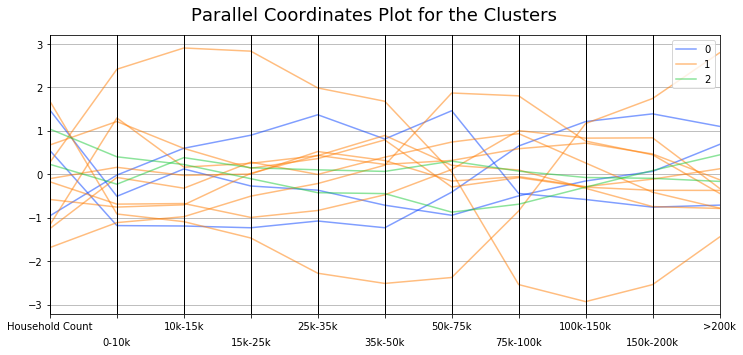

In [288]:
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled_clustered_income[income_list], 3)

In [289]:
X_og_income = X_og.rename(columns={"household_income_acs2018_Households (HH) Count": "Household Count",
                                          "household_income_acs2018_HH 0-10k": "0-10k",
                                           'household_income_acs2018_HH 10k-15k': '10k-15k',
                                           'household_income_acs2018_HH 15k-25k': '15k-25k',
                                           'household_income_acs2018_HH 25k-35k': '25k-35k',
                                           'household_income_acs2018_HH 35k-50k': '35k-50k',
                                           'household_income_acs2018_HH 50k-75k': '50k-75k',
                                           'household_income_acs2018_HH 75k-100k': '75k-100k',
                                           'household_income_acs2018_HH 100k-150k': '100k-150k',
                                           'household_income_acs2018_HH 150k-200k': '150k-200k',
                                           'household_income_acs2018_HH 200k-UP': '>200k'})

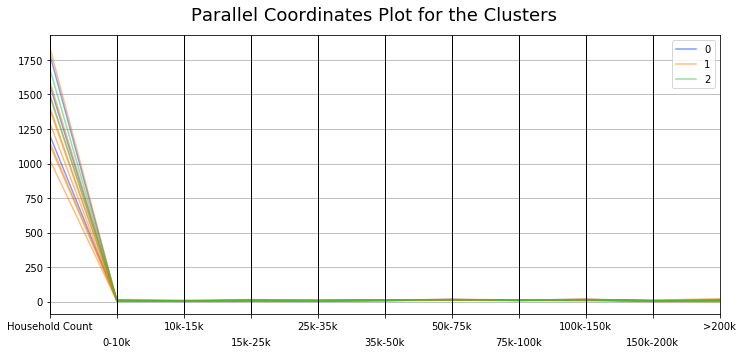

In [290]:
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_og_income[income_list], 3)

In [256]:
list_291 = ['291_2015_Discharges',
       '291_2015_Medicare_Payments', '291_2015_Total_Payments',
       '291_2015_Non_Medicare_Payments', '291_2016_Discharges',
       '291_2016_Medicare_Payments', '291_2016_Total_Payments',
       '291_2016_Non_Medicare_Payments', '291_2017_Discharges',
       '291_2017_Medicare_Payments', '291_2017_Total_Payments',
       '291_2017_Non_Medicare_Payments','cluster']

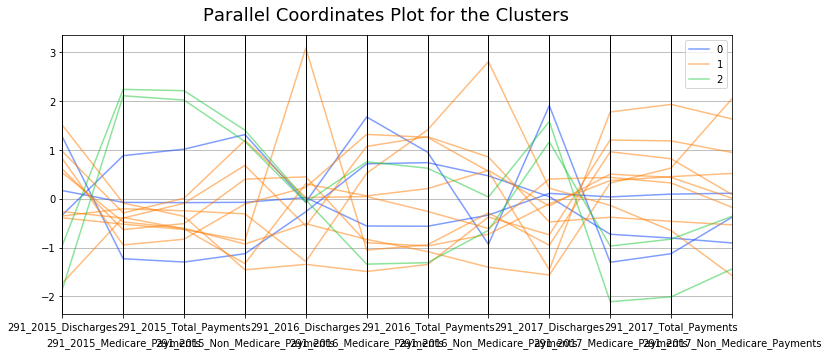

In [291]:
#Scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled_clustered[list_291], 3)

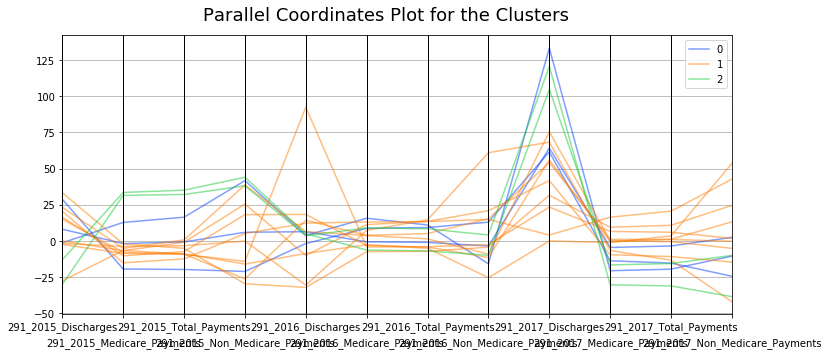

In [292]:
#Not scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_og[list_291], 3)

In [259]:
list_312 = ['312_2015_Discharges',
       '312_2015_Medicare_Payments', '312_2015_Total_Payments',
       '312_2015_Non_Medicare_Payments', '312_2016_Discharges',
       '312_2016_Medicare_Payments', '312_2016_Total_Payments',
       '312_2016_Non_Medicare_Payments', '312_2017_Discharges',
       '312_2017_Medicare_Payments', '312_2017_Total_Payments',
       '312_2017_Non_Medicare_Payments','cluster']

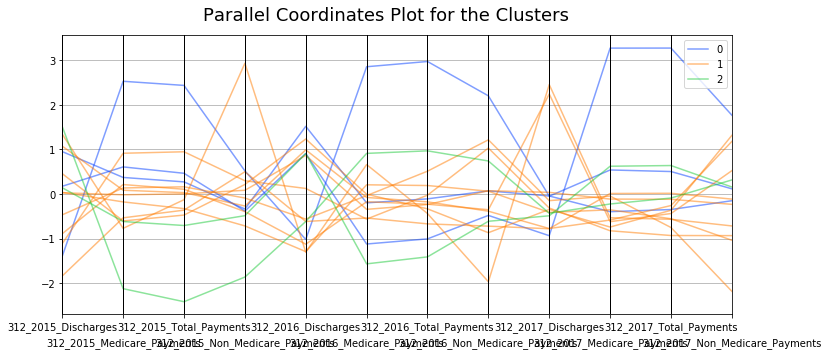

In [295]:
#Scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled_clustered[list_312], 3)

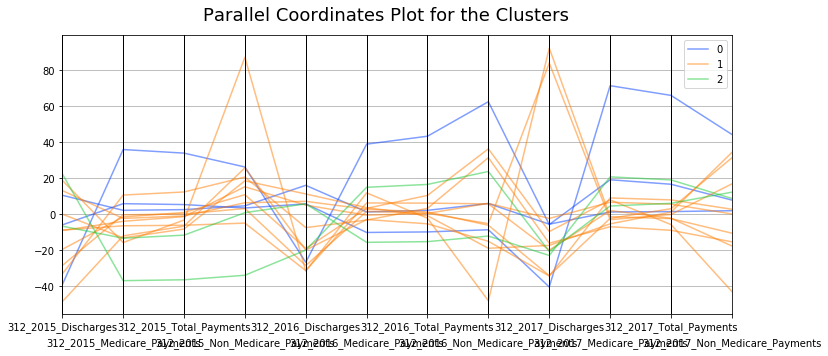

In [296]:
#Not scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_og[list_312], 3)

In [297]:
list_392 = ['392_2015_Discharges',
       '392_2015_Medicare_Payments', '392_2015_Total_Payments',
       '392_2015_Non_Medicare_Payments', '392_2016_Discharges',
       '392_2016_Medicare_Payments', '392_2016_Total_Payments',
       '392_2016_Non_Medicare_Payments', '392_2017_Discharges',
       '392_2017_Medicare_Payments', '392_2017_Total_Payments',
       '392_2017_Non_Medicare_Payments','cluster']

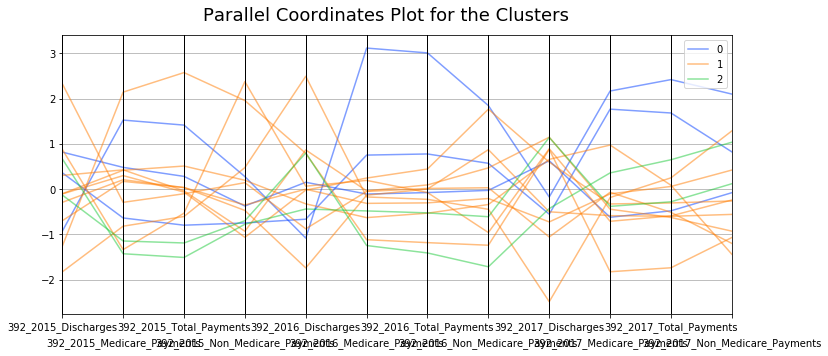

In [298]:
#Scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled_clustered[list_392], 3)

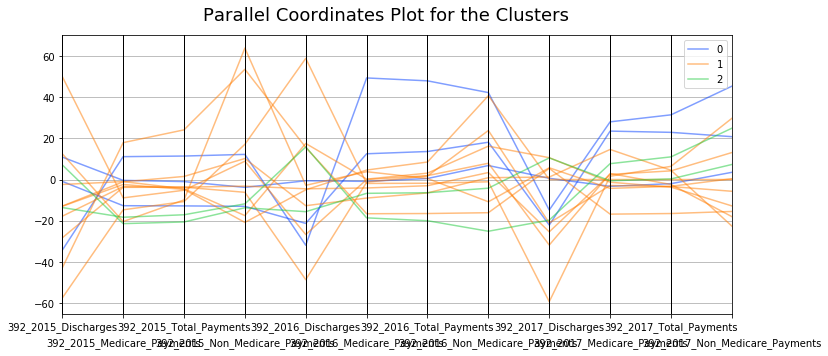

In [299]:
#Not scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_og[list_392], 3)

In [302]:
list_470 = ['470_2015_Discharges',
       '470_2015_Medicare_Payments', '470_2015_Total_Payments',
       '470_2015_Non_Medicare_Payments', '470_2016_Discharges',
       '470_2016_Medicare_Payments', '470_2016_Total_Payments',
       '470_2016_Non_Medicare_Payments', '470_2017_Discharges',
       '470_2017_Medicare_Payments', '470_2017_Total_Payments',
       '470_2017_Non_Medicare_Payments','cluster']

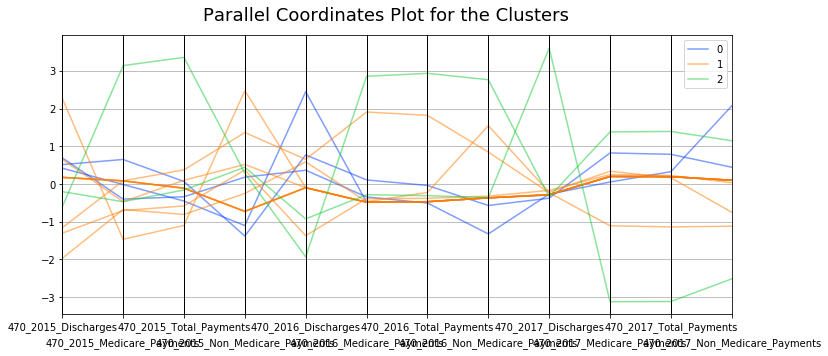

In [303]:
#Scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled_clustered[list_470], 3)

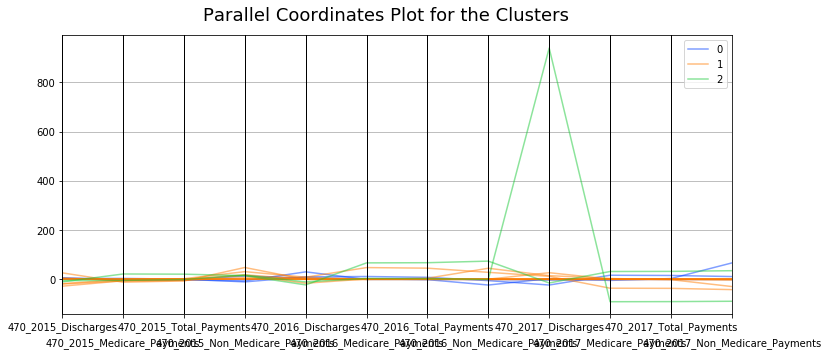

In [304]:
#Not scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_og[list_470], 3)

In [306]:
list_871 = ['871_2015_Discharges',
       '871_2015_Medicare_Payments', '871_2015_Total_Payments',
       '871_2015_Non_Medicare_Payments', '871_2016_Discharges',
       '871_2016_Medicare_Payments', '871_2016_Total_Payments',
       '871_2016_Non_Medicare_Payments', '871_2017_Discharges',
       '871_2017_Medicare_Payments', '871_2017_Total_Payments',
       '871_2017_Non_Medicare_Payments','cluster']

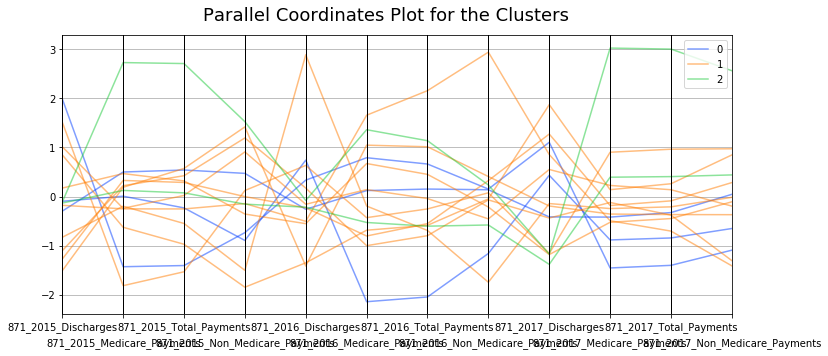

In [307]:
#Scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_scaled_clustered[list_871], 3)

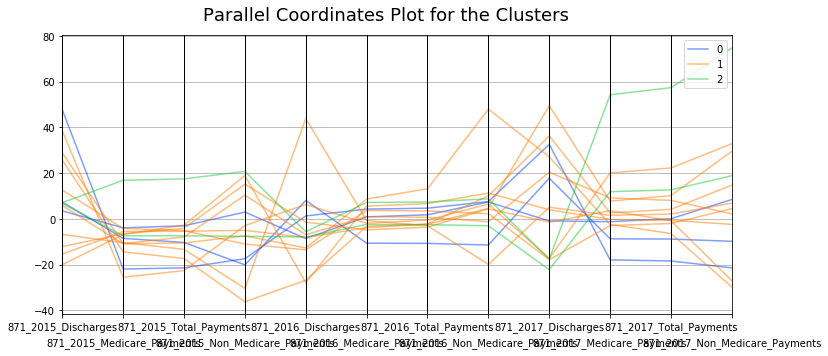

In [308]:
#Not scaled

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_og[list_871], 3)

In [102]:
X_1 = X.loc[:,'291_2015_Discharges':'291_2017_Non_Medicare_Payments']

In [103]:
scalerX = preprocessing.StandardScaler().fit(X_1)
dataXS = scalerX.transform(X_1)  

In [104]:
#perform PC decomposition over data311
pca = PCA(dataXS.shape[1])
dataXP = pca.fit_transform(dataXS)
eigenvalues = pca.explained_variance_ratio_

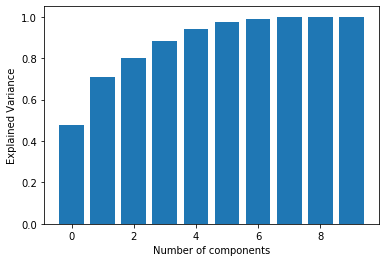

In [105]:
#plot explained variance over the number of compinents
n = 10
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [ ]:
scaler311 = preprocessing.StandardScaler().fit(data311)
data311S = scaler311.transform(data311)

#perform PC decomposition over data311
pca = PCA(data311S.shape[1])
data311P=pca.fit_transform(data311S)
eigenvalues = pca.explained_variance_ratio_

#plot explained variance over the number of compinents
n=40
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()